**Heart Disease Prediction using Classifiers**   

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('heart_disease.csv') #Reading the dataset

In [ ]:
df.head() #prints first five rows of the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info() #printing brief info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe() #Prints all the basic statistics of the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Calculating the correlation between the features and plotting a heat map

<Axes: >

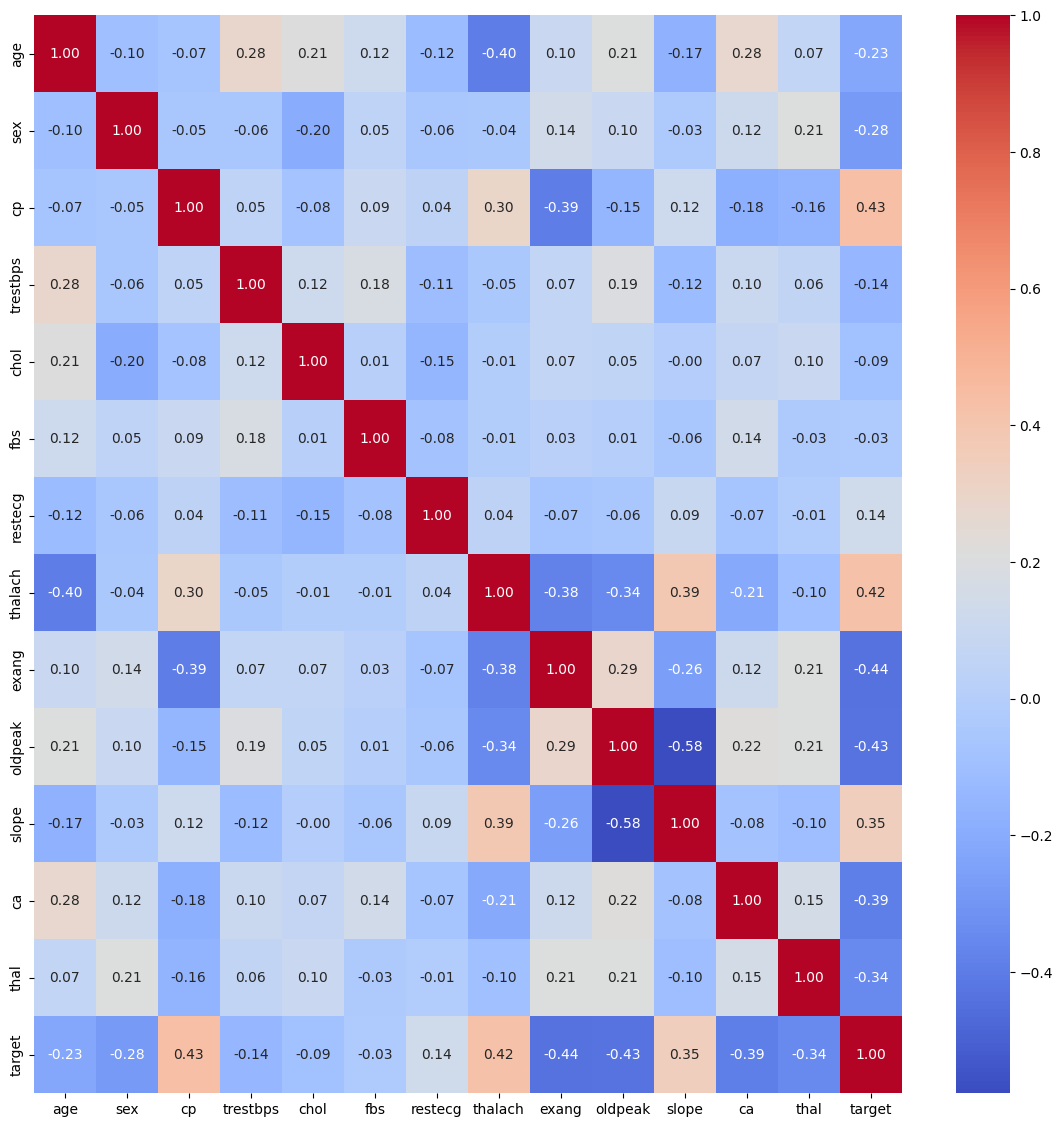

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

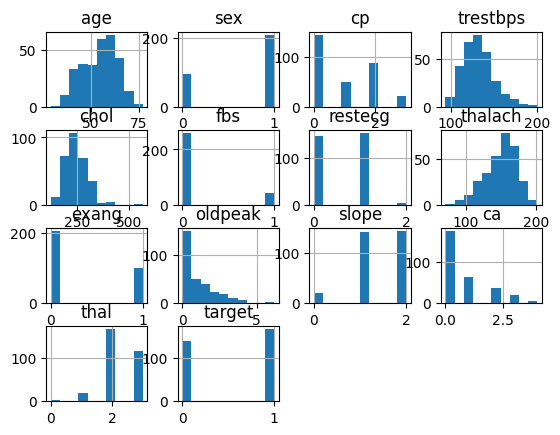

In [ ]:
df.hist() #plotting the histogram for all the featues to visualize the distribution

get_dummies method is used to convert categorical variables into dummy variables

In [ ]:
dataset = pd.get_dummies(df, columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])
print(dataset)

     age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1  cp_0  cp_1  \
0     63       145   233      150      2.3       1      0      1     0     0   
1     37       130   250      187      3.5       1      0      1     0     0   
2     41       130   204      172      1.4       1      1      0     0     1   
3     56       120   236      178      0.8       1      0      1     0     1   
4     57       120   354      163      0.6       1      1      0     1     0   
..   ...       ...   ...      ...      ...     ...    ...    ...   ...   ...   
298   57       140   241      123      0.2       0      1      0     1     0   
299   45       110   264      132      1.2       0      0      1     0     0   
300   68       144   193      141      3.4       0      0      1     1     0   
301   57       130   131      115      1.2       0      0      1     1     0   
302   57       130   236      174      0.0       0      1      0     0     1   

     ...  slope_2  ca_0  ca_1  ca_2  ca

Using standardscalar, we have normalised the quantitative variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
Separating the data into target and features

In [ ]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

1. **KNN Classifier**

In KNN Classifier, k value is taken from 1 to 21 and cross validationn is taken as 10. The k value with maximum accuracy is obtained

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 21)
knn_scores = []
for k in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(knn_classifier, X, y, cv=10)
    knn_scores.append(cv_results['test_score'].mean())

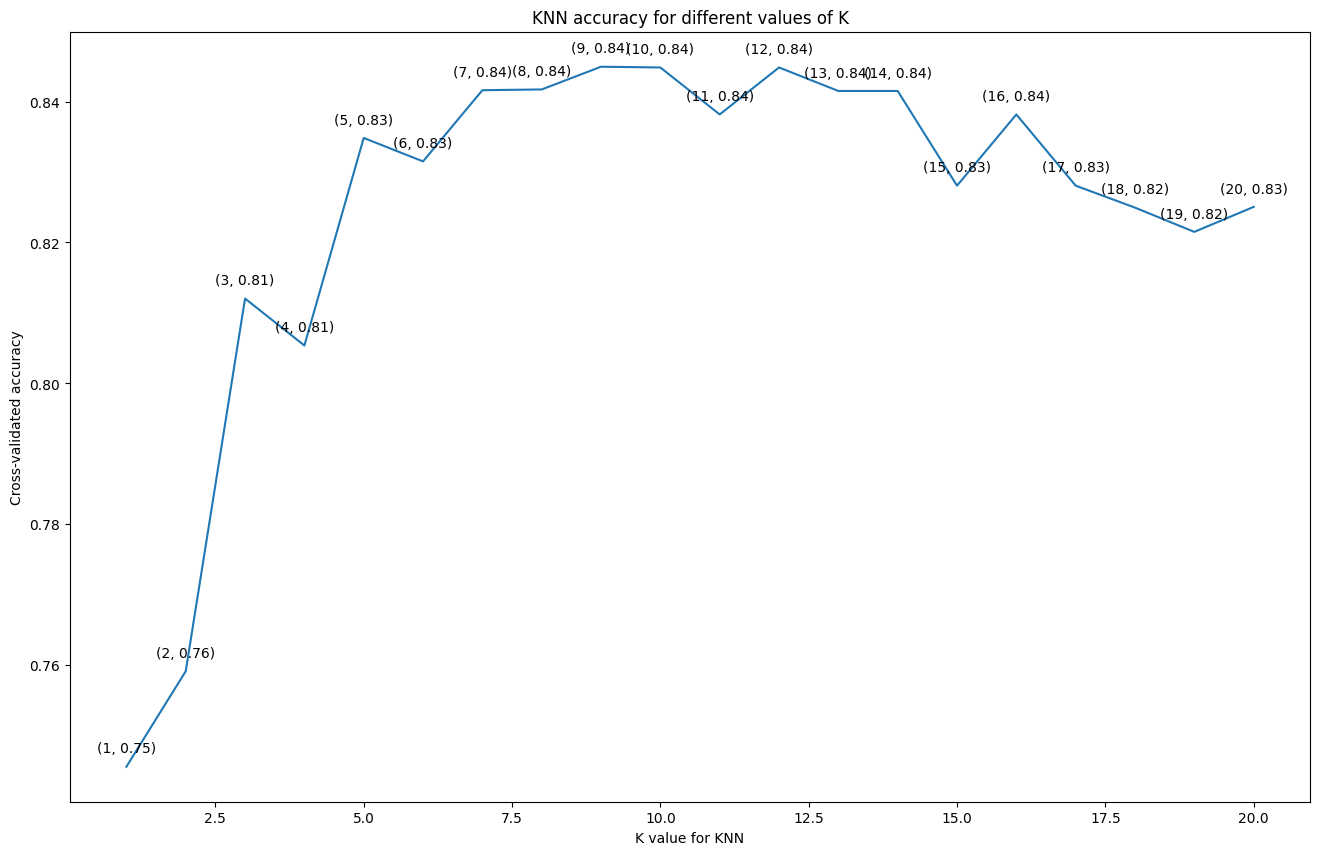

In [ ]:
import matplotlib.pyplot as plt

k_range = range(1, 21)

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(k_range, knn_scores)

# add labels
ax.set_xlabel('K value for KNN')
ax.set_ylabel('Cross-validated accuracy')
ax.set_title('KNN accuracy for different values of K')

# add coordinates as text labels
for k, score in zip(k_range, knn_scores):
    ax.annotate(f'({k}, {score:.2f})', xy=(k, score), textcoords='offset points', xytext=(0,10), ha='center')

# display coordinates on click
def on_click(event):
    if event.inaxes is not None:
        x, y = event.xdata, event.ydata
        print(f'({x:.3f}, {y:.3f})')
fig.canvas.mpl_connect('button_press_event', on_click)

# show plot
plt.show()


Highest accuracy is obtained at k = 12

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=12)
cv_results = cross_validate(knn_classifier, X, y, cv=10)
mean_test_score = np.mean(cv_results['test_score'])
print("Mean test score: ", mean_test_score)

Mean test score:  0.8448387096774195


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

prediction using KNN classifier

In [ ]:
value = {
    "age": 59,
      "sex_0": 0,
      "sex_1": 1,
      "cp_0": 0,
      "cp_1": 0,
      "cp_2": 0,
      "cp_3": 1,
      "trestbps": 134,
      "chol": 204,
      "fbs_0": 1,
      "fbs_1": 0,
      "restecg_0": 0,
      "restecg_1": 1,
      "restecg_2": 0,
      "thalach": 162,
      "exang_0": 1,
      "exang_1": 0,
      "oldpeak": 0.8,
      "slope_0": 0,
      "slope_1": 0,
      "slope_2": 1,
      "ca_0": 0,
      "ca_1": 0,
      "ca_2": 1,
      "ca_3": 0,
      "ca_4": 0,
      "thal_0": 0,
      "thal_1": 0,
      "thal_2": 1,
      "thal_3": 0
}

data = pd.DataFrame([value])
data
data = data.reindex(columns=X_train.columns)


# assume X_new is a pandas DataFrame containing the new data to predict on
# best_dt is the trained Decision Tree Classifier model

# make predictions on the new data
y_pred = knn_classifier.predict(data)

# print the predicted classes
print(y_pred)

[1]


2. **Support Vector Classifier**

Different Kernels are used in SVC, and best kernel is obtained, cross validation is taken as 10 folds.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    scores = cross_val_score(svc_classifier, X, y, cv=10)
    svc_scores.append(scores.mean())



Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

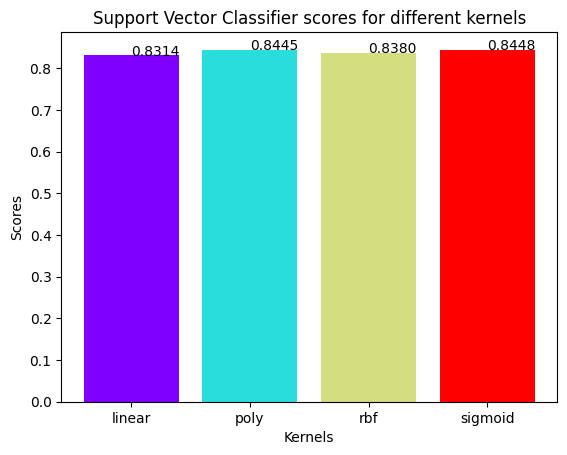

In [ ]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores,color=colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], f"{svc_scores[i]:.4f}")
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')


In [ ]:
max_score = max(svc_scores)
max_index = svc_scores.index(max_score)
print("The kernel with the highest score is", kernels[max_index], "with a score of", round(max_score, 3))

The kernel with the highest score is sigmoid with a score of 0.845


The maximum accuracy is obtained by Sigmoid kernel

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)


Prediction using SVC

In [ ]:
value = {
    "age": 59,
      "sex_0": 0,
      "sex_1": 1,
      "cp_0": 0,
      "cp_1": 0,
      "cp_2": 0,
      "cp_3": 1,
      "trestbps": 134,
      "chol": 204,
      "fbs_0": 1,
      "fbs_1": 0,
      "restecg_0": 0,
      "restecg_1": 1,
      "restecg_2": 0,
      "thalach": 162,
      "exang_0": 1,
      "exang_1": 0,
      "oldpeak": 0.8,
      "slope_0": 0,
      "slope_1": 0,
      "slope_2": 1,
      "ca_0": 0,
      "ca_1": 0,
      "ca_2": 1,
      "ca_3": 0,
      "ca_4": 0,
      "thal_0": 0,
      "thal_1": 0,
      "thal_2": 1,
      "thal_3": 0
}

data = pd.DataFrame([value])
data
data = data.reindex(columns=X_train.columns)


# assume X_new is a pandas DataFrame containing the new data to predict on
# best_dt is the trained Decision Tree Classifier model

# make predictions on the new data
y_pred = svc.predict(data)

# print the predicted classes
print(y_pred)

[0]


3. **Decision tree classifier**

Decision tree classifier with GridsearchCV is used, the best maximum features are selected

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Define the grid of hyperparameters to search
param_grid = {'max_features': range(1, len(X.columns) + 1)}

# Search over the grid of hyperparameters using 10-fold cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and print the accuracy score
best_max_features = grid_search.best_params_['max_features']
best_dt_classifier = grid_search.best_estimator_
accuracy_score = best_dt_classifier.score(X_test, y_test)

print(f"Best max_features: {best_max_features}")
print(f"Accuracy score: {accuracy_score}")


Best max_features: 4
Accuracy score: 0.8461538461538461


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search over
param_grid = {'max_features': range(1, len(X.columns) + 1)}

# Create a Decision Tree Classifier object
dt_classifier = DecisionTreeClassifier(random_state=0)

# Create a GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and score on the test data
best_dt = grid_search.best_estimator_
dt_scores = best_dt.score(X_test, y_test)


In [ ]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

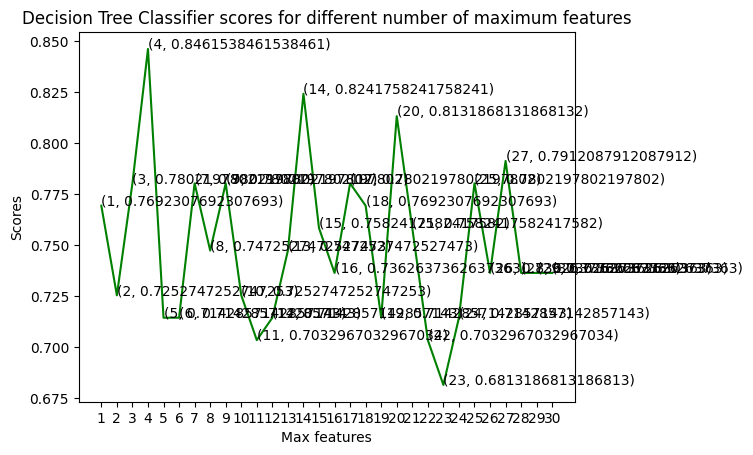

In [ ]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [ ]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[3]*100, 4))

The score for Decision Tree Classifier is 84.61538461538461% with 4 maximum features.


Prediction is done

In [ ]:
value = {
    "age": 63,
      "sex_0": 0,
      "sex_1": 1,
      "cp_0": 0,
      "cp_1": 0,
      "cp_2": 0,
      "cp_3": 1,
      "trestbps": 145,
      "chol": 233,
      "fbs_0": 0,
      "fbs_1": 1,
      "restecg_0": 1,
      "restecg_1": 0,
      "restecg_2": 0,
      "thalach": 150,
      "exang_0": 1,
      "exang_1": 0,
      "oldpeak": 2.3,
      "slope_0": 1,
      "slope_1": 0,
      "slope_2": 0,
      "ca_0": 1,
      "ca_1": 0,
      "ca_2": 0,
      "ca_3": 0,
      "ca_4": 0,
      "thal_0": 0,
      "thal_1": 1,
      "thal_2": 0,
      "thal_3": 0
}

data = pd.DataFrame([value])
data
data = data.reindex(columns=X_train.columns)


# assume X_new is a pandas DataFrame containing the new data to predict on
# best_dt is the trained Decision Tree Classifier model

# make predictions on the new data
y_pred = best_dt.predict(data)

# print the predicted classes
print(y_pred)


[1]


4. **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
estimators = [10, 100, 200, 500, 1000] #Differnt number of estimators are taken
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

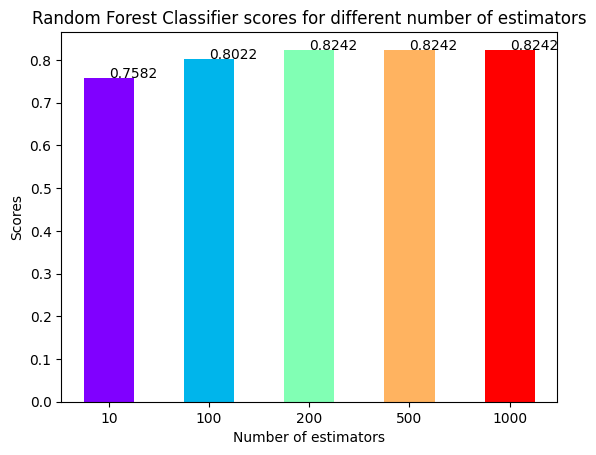

In [ ]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.5)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], f"{rf_scores[i]:.4f}")
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')


In [ ]:
for i in range(len(estimators)):
  print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[i]*100, estimators[i]))

The score for Random Forest Classifier is 75.82417582417582% with 10 estimators.
The score for Random Forest Classifier is 80.21978021978022% with 100 estimators.
The score for Random Forest Classifier is 82.41758241758241% with 200 estimators.
The score for Random Forest Classifier is 82.41758241758241% with 500 estimators.
The score for Random Forest Classifier is 82.41758241758241% with 1000 estimators.


prediction using random forest classifier

In [ ]:
value = {
    "age": 59,
      "sex_0": 0,
      "sex_1": 1,
      "cp_0": 0,
      "cp_1": 0,
      "cp_2": 0,
      "cp_3": 1,
      "trestbps": 134,
      "chol": 204,
      "fbs_0": 1,
      "fbs_1": 0,
      "restecg_0": 0,
      "restecg_1": 1,
      "restecg_2": 0,
      "thalach": 162,
      "exang_0": 1,
      "exang_1": 0,
      "oldpeak": 0.8,
      "slope_0": 0,
      "slope_1": 0,
      "slope_2": 1,
      "ca_0": 0,
      "ca_1": 0,
      "ca_2": 1,
      "ca_3": 0,
      "ca_4": 0,
      "thal_0": 0,
      "thal_1": 0,
      "thal_2": 1,
      "thal_3": 0
}

data = pd.DataFrame([value])
data
data = data.reindex(columns=X_train.columns)


# assume X_new is a pandas DataFrame containing the new data to predict on
# best_dt is the trained Decision Tree Classifier model

# make predictions on the new data
y_pred = rf_classifier.predict(data)

# print the predicted classes
print(y_pred)

[1]


**Conclusion: ** Decision Tree Classifier have given the highest accuracy of 84.6%.